In [303]:
#Diamond price |Regression | EDA


In [305]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [307]:
diamond_df = pd.read_csv('data\\diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,2,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,3,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,4,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,5,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500


In [309]:
diamond_df.shape

(53940, 11)

In [311]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [313]:
diamond_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [315]:
diamond_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

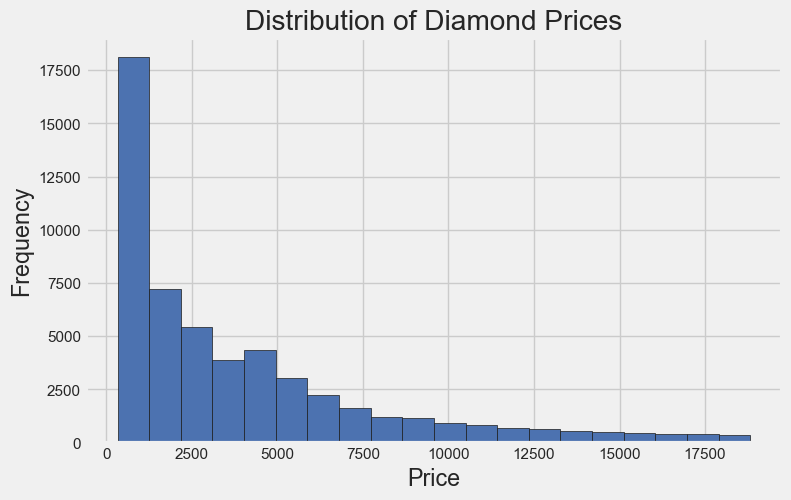

In [317]:
plt.figure(figsize=(8,5))
plt.hist(diamond_df['price'], bins=20, color='b', edgecolor='k');
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

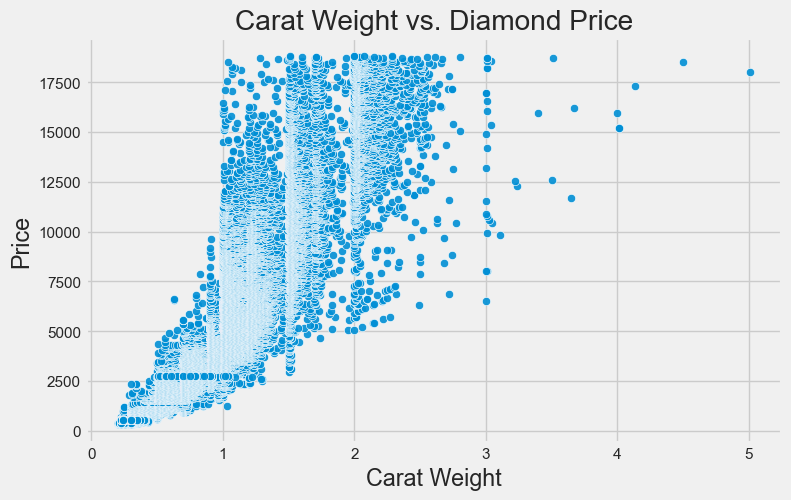

In [319]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=diamond_df, alpha=0.9)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Carat Weight vs. Diamond Price')
plt.show()

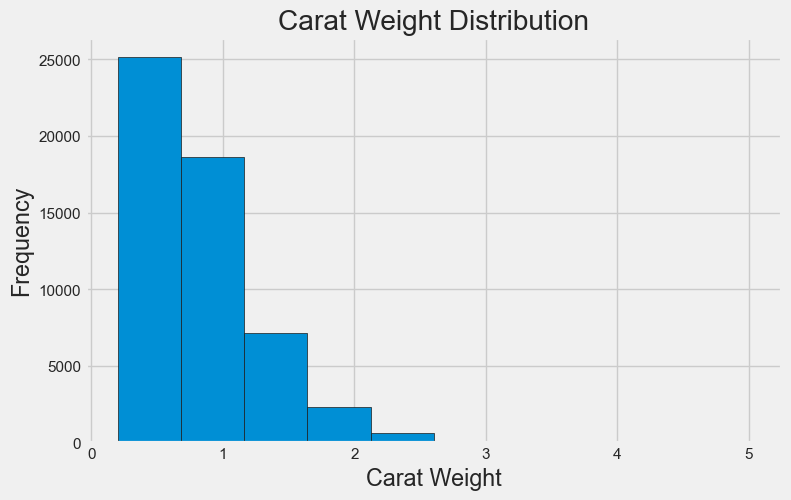

In [321]:
plt.figure(figsize=(8, 5))
plt.hist(diamond_df['carat'], bins=10, edgecolor='k')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Carat Weight Distribution')
plt.show()

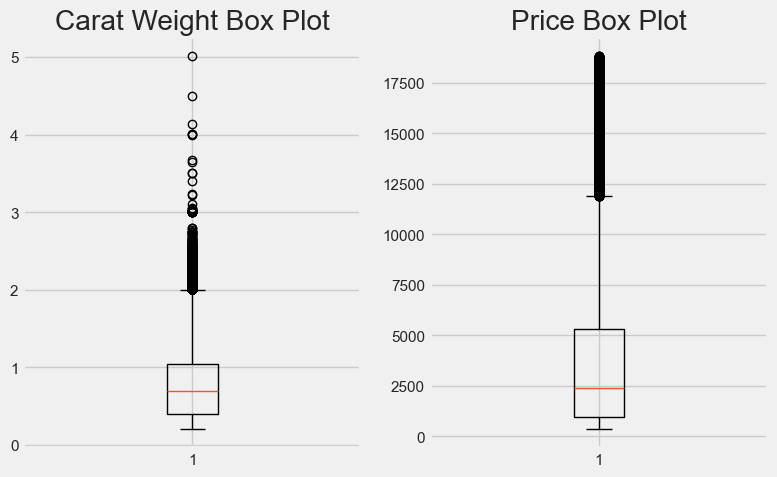

In [323]:
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.boxplot(diamond_df['carat'])
plt.title('Carat Weight Box Plot')

plt.subplot(1, 2, 2)
plt.boxplot(diamond_df['price'])
plt.title('Price Box Plot')

plt.tight_layout()
plt.show()

In [325]:
cut_quality_prices = diamond_df.groupby('cut')['price'].mean()
cut_quality_prices

cut
Fair        4358.7578
Good        3928.8645
Ideal       3457.5420
Premium     4584.2577
Very Good   3981.7599
Name: price, dtype: float64

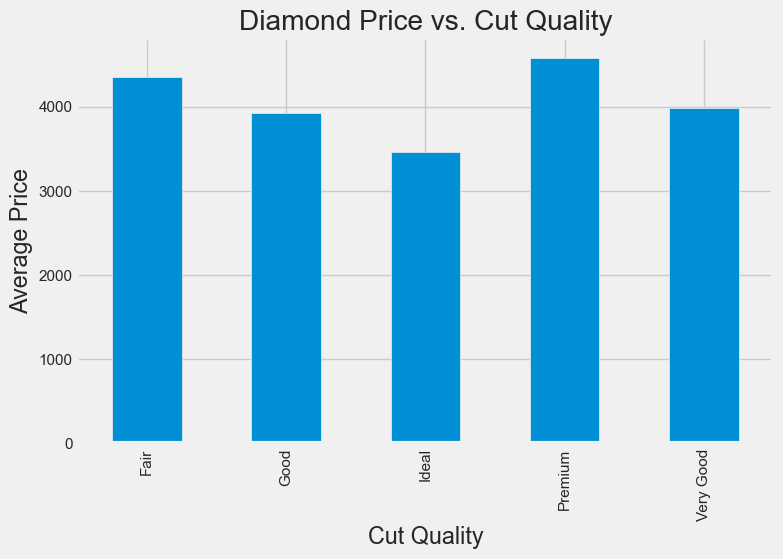

In [327]:
plt.figure(figsize=(8,5))
cut_quality_prices.plot(kind='bar')
plt.xlabel('Cut Quality')
plt.ylabel('Average Price')
plt.title('Diamond Price vs. Cut Quality')
plt.show()

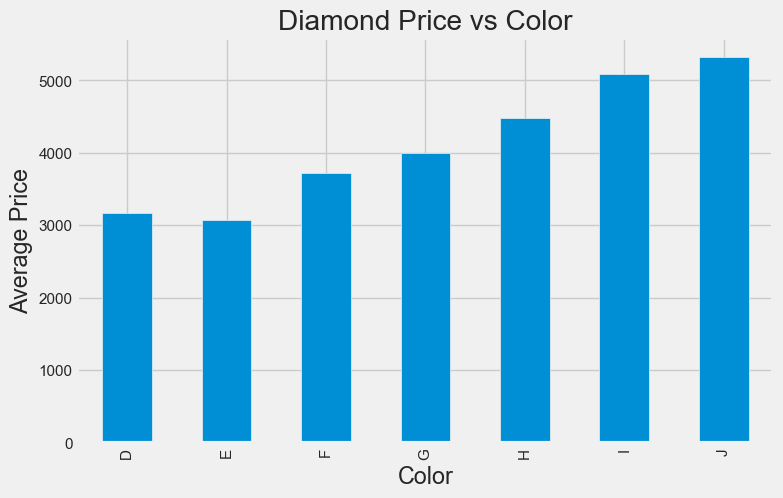

In [329]:
color_prices = diamond_df.groupby('color')['price'].mean()

plt.figure(figsize=(8,5))
color_prices.plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Diamond Price vs Color')
plt.show()

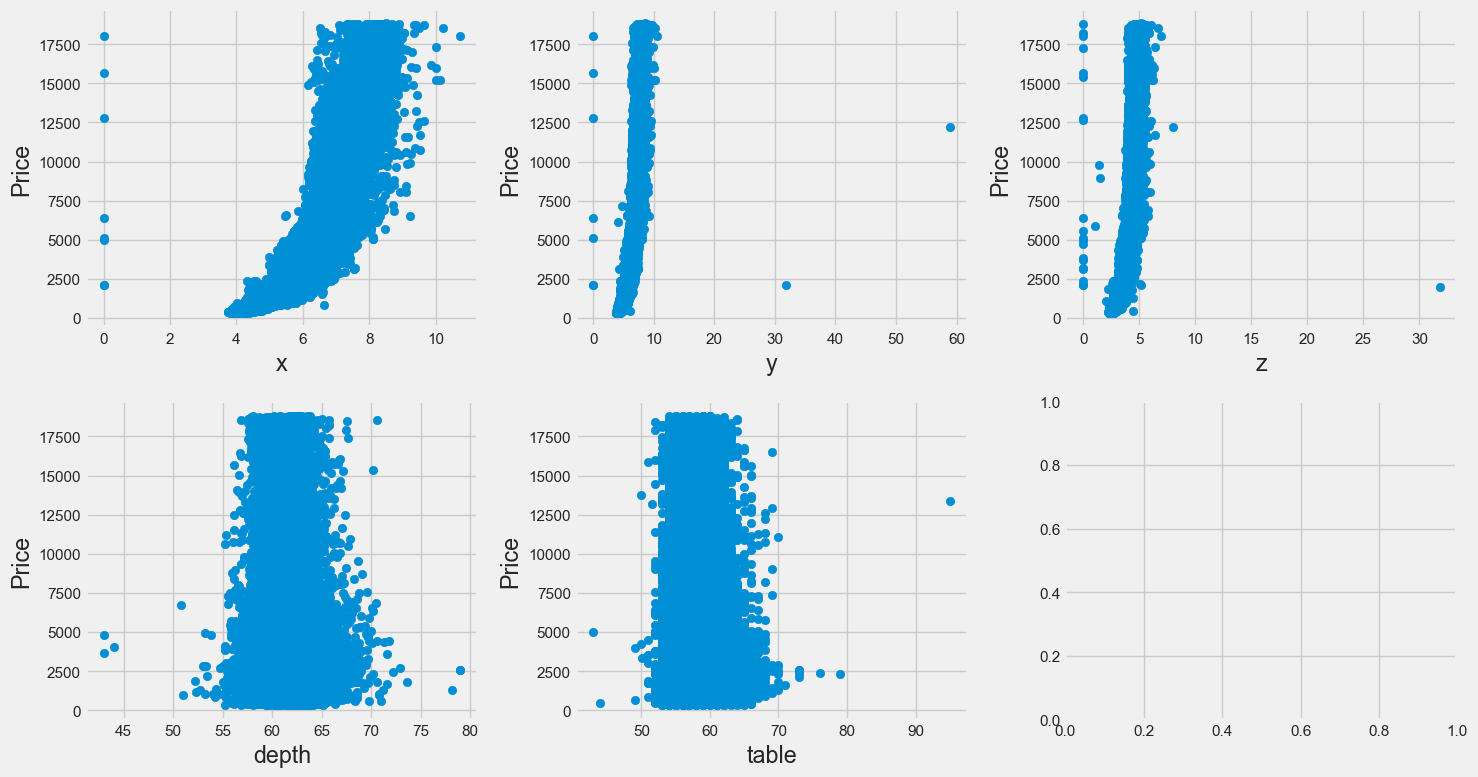

In [331]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
features = ['x', 'y', 'z', 'depth', 'table']

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    ax[row, col].scatter(diamond_df[feature], diamond_df['price'])
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('Price')

plt.tight_layout()
plt.show()

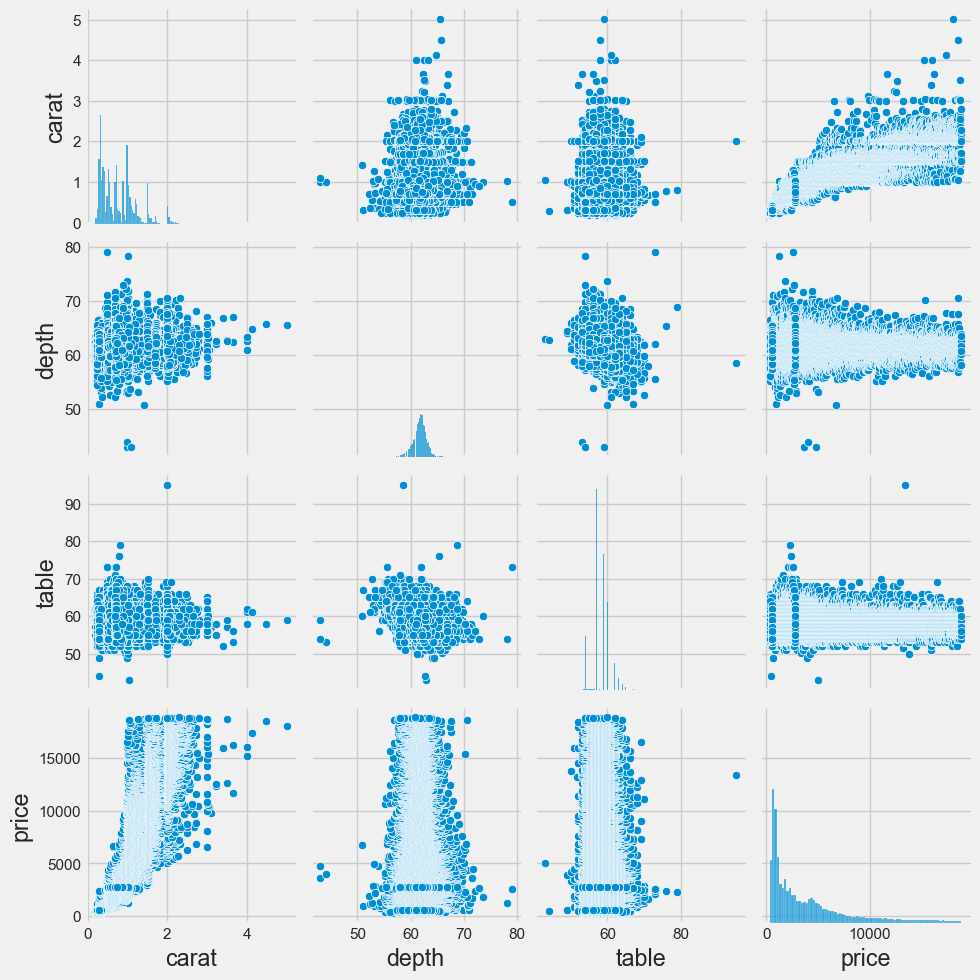

In [333]:
sns.pairplot(diamond_df[['carat', 'depth', 'table', 'price']])
plt.show()

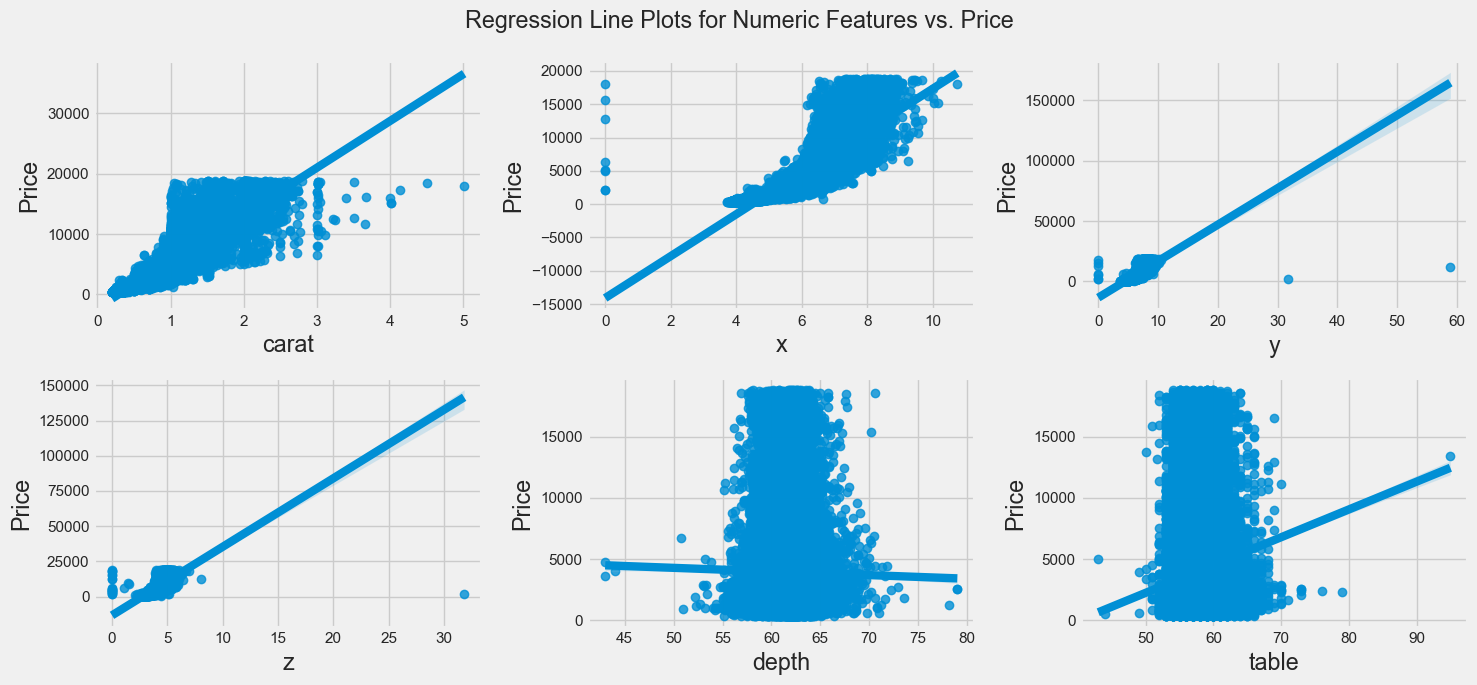

In [335]:
numeric_features = ['carat', 'x', 'y', 'z', 'depth', 'table']

fig, ax = plt.subplots(2, 3, figsize=(15,7))
fig.suptitle('Regression Line Plots for Numeric Features vs. Price')

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    sns.regplot(x=feature, y='price', data=diamond_df, ax=ax[row, col])
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('Price')
    
plt.tight_layout()
plt.show()

In [337]:
X = diamond_df.drop(['price'], axis=1)
y = diamond_df['price']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(43152, 10) (10788, 10)


In [339]:
label_encoder = LabelEncoder()

X_train['cut'] = label_encoder.fit_transform(X_train['cut'])
X_test['cut'] = label_encoder.transform(X_test['cut'])

X_train['color'] = label_encoder.fit_transform(X_train['color'])
X_test['color'] = label_encoder.transform(X_test['color'])

X_train['clarity'] = label_encoder.fit_transform(X_train['clarity'])
X_test['clarity'] = label_encoder.transform(X_test['clarity'])

In [341]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [343]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 1778835.12
Mean Absolute Error: 865.94
Root Mean Squared Error: 1333.73
R2 Score: 0.89


TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

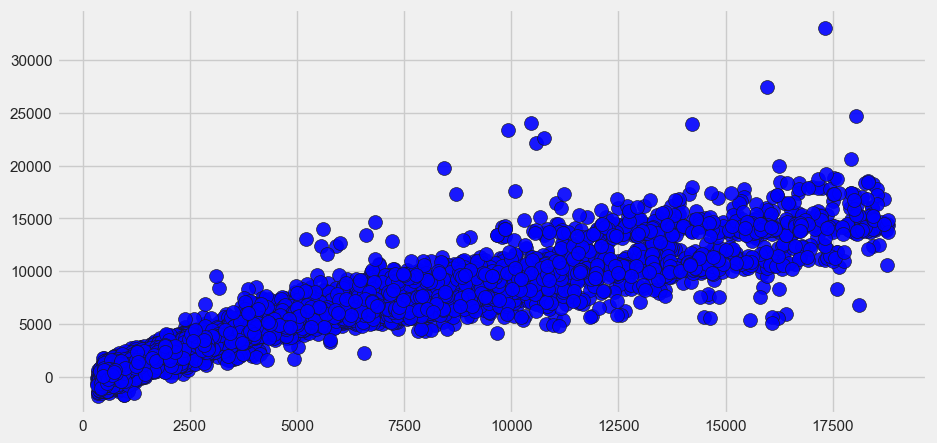

In [347]:
#Create a scatter plot of the actual data points
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue',alpha=0.9, s=100, edgecolors='k', label='Actual Data')

#Create regression line plot
sns.regplot(y_test, y_pred, color='r', scatter=False, line_kws={"color": "r", "lw": 2})

# #Set labels and title
plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Linear Regression Line Plot')

plt.legend()

plt.show()

In [349]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 1849.45
Mean Absolute Error: 2.76
Root Mean Squared Error: 43.01
R2 Score: 1.00


In [351]:
# Create and train the XGBoost model
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

#Make predictions on the test dataset
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 26072.80
Mean Absolute Error: 89.71
Root Mean Squared Error: 161.47
R2 Score: 1.00
